In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline  
print ("packs loaded")

packs loaded


Download and Extract MNIST dataset

In [4]:
print ("Download and Extract MNIST dataset")
mnist = input_data.read_data_sets('data/', one_hot=True)
print
print (" tpye of 'mnist' is %s" % (type(mnist)))
print (" number of trian data is %d" % (mnist.train.num_examples))
print (" number of test data is %d" % (mnist.test.num_examples))

Download and Extract MNIST dataset
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
 tpye of 'mnist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
 number of trian data is 55000
 number of test data is 10000


In [9]:
print(mnist.train.images.shape)

print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


![](https://ws1.sinaimg.cn/large/006tNbRwgy1fwcep8zqrmj30nh0eutdh.jpg)

In [10]:
# What does the data of MNIST look like? 
print ("What does the data of MNIST look like?")
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print
print (" type of 'trainimg' is %s"    % (type(trainimg)))
print (" type of 'trainlabel' is %s"  % (type(trainlabel)))
print (" type of 'testimg' is %s"     % (type(testimg)))
print (" type of 'testlabel' is %s"   % (type(testlabel)))
print (" shape of 'trainimg' is %s"   % (trainimg.shape,))
print (" shape of 'trainlabel' is %s" % (trainlabel.shape,))
print (" shape of 'testimg' is %s"    % (testimg.shape,))
print (" shape of 'testlabel' is %s"  % (testlabel.shape,))

What does the data of MNIST look like?
 type of 'trainimg' is <class 'numpy.ndarray'>
 type of 'trainlabel' is <class 'numpy.ndarray'>
 type of 'testimg' is <class 'numpy.ndarray'>
 type of 'testlabel' is <class 'numpy.ndarray'>
 shape of 'trainimg' is (55000, 784)
 shape of 'trainlabel' is (55000, 10)
 shape of 'testimg' is (10000, 784)
 shape of 'testlabel' is (10000, 10)


How does the training data look like?
23426th Training Data Label is 4
43078th Training Data Label is 5
29118th Training Data Label is 7
3601th Training Data Label is 9
22963th Training Data Label is 5


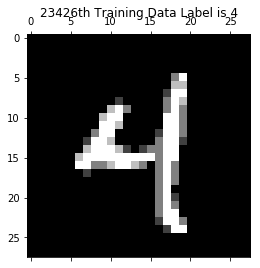

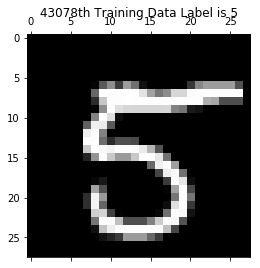

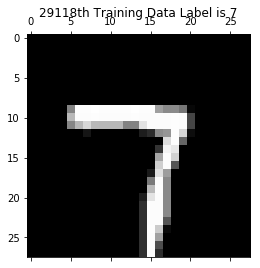

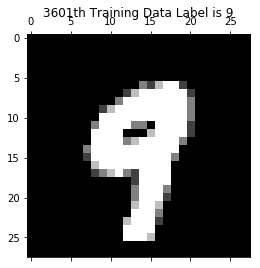

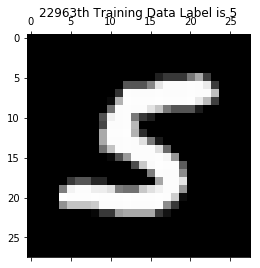

In [11]:
# How does the training data look like?
print ("How does the training data look like?")
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # One-Hot Vector을 Label로 만들어 준다.
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))

RANDOM PERMUTE

In [17]:
ntrain = 10
randindices = np.random.permutation(ntrain)
print(randindices.shape)
print(randindices)

(10,)
[6 5 8 9 1 0 2 3 7 4]


In [18]:
ntrain = 10
nbatch = 4
niter = ntrain // nbatch + 1
for i in range(niter):
    curridices = randindices[i*nbatch:(i+1)*nbatch]
    print("ITER: [%d] BATCH INDEX: %s" % (i,curridices))
    
    # GET BATCH
    xbatch = mnist.train.images[curridices, :]
    ybatch = mnist.train.labels[curridices, :]
    print(" - SHAPE OF 'batch_x' is %s" % (xbatch.shape,))
    print(" - SHAPE OF 'batch_y' is %s" % (ybatch.shape,))

ITER: [0] BATCH INDEX: [6 5 8 9]
 - SHAPE OF 'batch_x' is (4, 784)
 - SHAPE OF 'batch_y' is (4, 10)
ITER: [1] BATCH INDEX: [1 0 2 3]
 - SHAPE OF 'batch_x' is (4, 784)
 - SHAPE OF 'batch_y' is (4, 10)
ITER: [2] BATCH INDEX: [7 4]
 - SHAPE OF 'batch_x' is (2, 784)
 - SHAPE OF 'batch_y' is (2, 10)


MNIST를 하나를 Reshape를 해서 한줄로 펴서 활용한다.